In [ ]:
import pandas as pd

# Read the US pumpkins .csv file from /data sub-folder
pumpkins = pd.read_csv('../data/US-pumpkins.csv')

# Filter out any rows that don't use price per bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

In [ ]:
# Count how many cells in each colum are empty
pumpkins.isnull().sum()

In [ ]:
# Define the columns we want to keep
new_columns = ['Package', 'Month', "Low Price", 'High Price', 'Date']

# Drop all other columns
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
pumpkins.head()

In [ ]:
# Calculate the average price from the high and low price columns
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
# print(price)
# price.head()

# Get the month from the date column
month = pd.DatetimeIndex(pumpkins['Date']).month
# print(month)

# Create a new dataframe with the new columns
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.head()


In [ ]:
# Convert the price of all cells prices by 1 1/9 bushels by dividing by 1 1/9
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

# Convert the price of all cells prices by 1/2 bushels by dividing by 1/2
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
new_pumpkins.head()

In [ ]:
import matplotlib.pyplot as plt

# Get the values for the plot
price = new_pumpkins.Price
month = new_pumpkins.Month
# print(price)
# print(month)

# Create a show a scatter plot of price vs month
plt.scatter(price, month)
plt.show


Text(0, 0.5, 'Pumpkin Price')

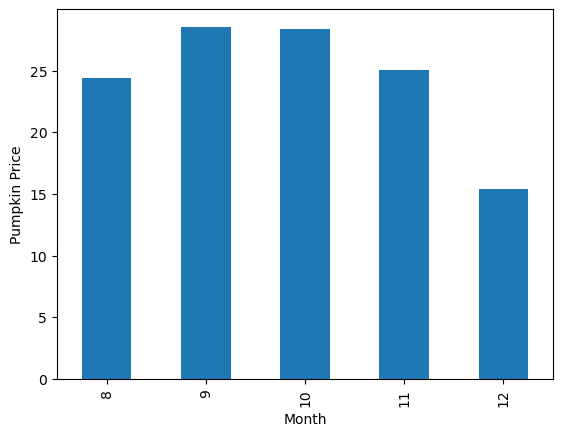

In [12]:
# Group the pumpkins into a cbar chart by month and price
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')

# Add a label to the bar chart
plt.ylabel("Pumpkin Price")
